In [3]:
      import pandas as pd
      import numpy as np
      import matplotlib.pyplot as plt
      import seaborn as sns

      # Configuración para que los gráficos se muestren en el notebook
      %matplotlib inline

In [4]:
      # Define la ruta a la carpeta de datos
      DATA_PATH = '../data/ml-25m/'

      # Carga los datasets en DataFrames de pandas
      movies_df = pd.read_csv(f'{DATA_PATH}movies.csv')
      ratings_df = pd.read_csv(f'{DATA_PATH}ratings.csv')

In [5]:
      print("Información de movies_df:")
      movies_df.info()

      print("\nPrimeras 5 filas de movies_df:")
      movies_df.head()

Información de movies_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB

Primeras 5 filas de movies_df:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
      print("Información de ratings_df:")
      ratings_df.info()

      print("\nEstadísticas descriptivas de ratings_df:")
      ratings_df.describe()
      
      print("\nChequeo de valores nulos en ratings_df:")
      ratings_df.isnull().sum()

Información de ratings_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB

Estadísticas descriptivas de ratings_df:

Chequeo de valores nulos en ratings_df:


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

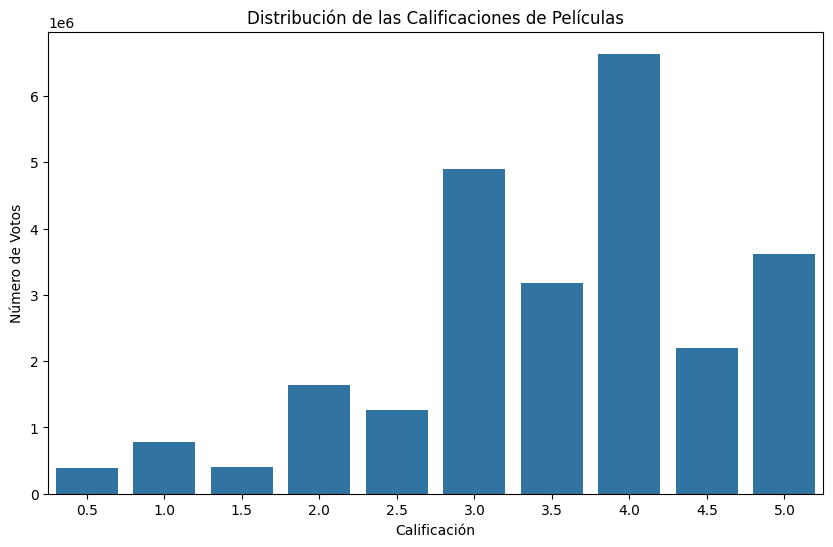

In [7]:
      plt.figure(figsize=(10, 6))
      sns.countplot(x='rating', data=ratings_df)
      plt.title('Distribución de las Calificaciones de Películas')
      plt.xlabel('Calificación')
      plt.ylabel('Número de Votos')
      plt.show()

In [8]:
      # Contar cuántas calificaciones tiene cada película
      movie_counts = ratings_df['movieId'].value_counts()

      # Unir esta información con los títulos de las películas
      top_movies = movie_counts.to_frame().reset_index()
      top_movies.columns = ['movieId', 'rating_count']
      top_movies = pd.merge(top_movies, movies_df, on='movieId')

      print("Top 10 películas con más calificaciones:")
      top_movies.head(10)

Top 10 películas con más calificaciones:


,movieId,rating_count,title,genres
0,356,81491,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,81482,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,79672,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,74127,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,72674,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,68717,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,480,64144,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
7,527,60411,Schindler's List (1993),Drama|War
8,110,59184,Braveheart (1995),Action|Drama|War
9,2959,58773,Fight Club (1999),Action|Crime|Drama|Thriller


In [9]:
      # Contar cuántas calificaciones tiene cada película
      movie_counts = ratings_df['movieId'].value_counts()

      # Unir esta información con los títulos de las películas
      top_movies = movie_counts.to_frame().reset_index()
      top_movies.columns = ['movieId', 'rating_count']
      top_movies = pd.merge(top_movies, movies_df, on='movieId')

      print("Top 10 películas con más calificaciones:")
      top_movies.head(10)

Top 10 películas con más calificaciones:


,movieId,rating_count,title,genres
0,356,81491,Forrest Gump (1994),Comedy|Drama|Romance|War
1,318,81482,"Shawshank Redemption, The (1994)",Crime|Drama
2,296,79672,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,74127,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,72674,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,68717,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,480,64144,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
7,527,60411,Schindler's List (1993),Drama|War
8,110,59184,Braveheart (1995),Action|Drama|War
9,2959,58773,Fight Club (1999),Action|Crime|Drama|Thriller


In [10]:
      # Contar cuántas películas ha calificado cada usuario
      user_counts = ratings_df['userId'].value_counts()

      print("\nTop 10 usuarios más activos:")
      print(user_counts.head(10))


Top 10 usuarios más activos:
userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
109731     6647
92046      6564
49403      6553
30879      5693
115102     5649
Name: count, dtype: int64
